# Using Python Analyze Kenyan Hospital Data

## Description 

In this project, I uterlize the python libriries of Numpy, Matplot lib, and Seaborn to analyze and visualize Kenyan Hopital data by filtering, agggregating hiospital data using pivot tables, ploting bar and pie chats to identify the trend in health care facilities in the country.

### Questions:

1. How many health facilities are represented in each Keph level within the data?
2. Which column has the highest number of missing values? What percentage of missing values does column have?
3. Give the code(s) of health Level 6 health facilities open on public holidays according to the dataset?
4. How many health facilities have their owner type as 'Faith Based Organization'?
5. Which county has the lowest number of beds?
6. Which county has the lowest number of cots?
7. What is the median number of beds across health facilities in Nairobi?
8. Which ward in Nairobi has the highest number of health facilities above Level 3 and above? 
9. Using the columns 'Open_whole_day',	'Open_public_holidays',	'Open_weekends',	'Open_late_night' create a new column 'Always_open' that 
is Yes when all the values from the 4 columns is Yes otherwise it is no. How many health facilities are always open?
10. Which county has the highest Bed and Cots relative to number of health facilities within the county? i.e - Bed and Cots/No. of Health Facilities

In [1]:
import pandas as pd

In [2]:
# Import data
df = pd.read_csv('kenya-hospital-ke.csv')
df.sample(5)

,Code,Name,Officialname,Registration_number,Keph level,Facility type,Facility_type_category,Owner,Owner type,Regulatory body,...,Ward,Operation status,Open_whole_day,Open_public_holidays,Open_weekends,Open_late_night,Service_names,Approved,Public visible,Closed
5556,18239,Family Health Centre (Embu),Family Health Centre (Embu),None,Level 3,Medical Center,MEDICAL CENTER,Private Practice - Nurse / Midwifery,Private Practice,Nursing Council of Kenya (Private Practice),...,Kirimari,Operational,No,No,No,No,NaN,Yes,Yes,No
11169,13607,Homa Lime Health Centre,Homa Lime Health Centre,None,Level 3,Basic Health Centre,HEALTH CENTRE,Ministry of Health,Ministry of Health,Ministry of Health,...,West Karachuonyo,Operational,Yes,No,Yes,No,NaN,Yes,Yes,No
1480,23888,Rongo Bahati Medical Centre,Rongo Bahati Medical Centre,015012,Level 2,Medical Clinic,MEDICAL CLINIC,Private Practice - Nurse / Midwifery,Private Practice,Nursing Council of Kenya (Private Practice),...,Central Kamagambo,Operational,Yes,Yes,Yes,Yes,NaN,Yes,Yes,No
11028,12900,Crescent Medical Aid (Pangani),Crescent Medical Aid (Pangani),None,Level 2,Medical Clinic,MEDICAL CLINIC,Non-Governmental Organizations,Non-Governmental Organizations,Kenya MPDB,...,Pangani,Operational,No,No,No,No,NaN,Yes,Yes,No
11129,13896,Nyamanga Dispensary,Nyamanga Dispensary,None,Level 2,Dispensary,DISPENSARY,Ministry of Health,Ministry of Health,Ministry of Health,...,Kanyamwa Kosewe,Operational,No,No,No,No,NaN,Yes,Yes,No


1. How many health facilities are represented in each Keph level within the data? (6 marks)

In [60]:
df['Keph level'].value_counts()

Level 2    9411
Level 3    2139
Level 4     818
Level 5      19
Level 6       6
None          1
Name: Keph level, dtype: int64

2. Which column has the highest number of missing values? What percentage of missing values does column have? (2 marks)

In [61]:
df.isna().sum() / len(df) * 100
# Service_names - 100% missing values

Code                        0.000000
Name                        0.000000
Officialname                0.000000
Registration_number         0.411489
Keph level                  0.000000
Facility type               0.000000
Facility_type_category      0.000000
Owner                       0.000000
Owner type                  0.000000
Regulatory body             0.000000
Beds                        0.000000
Cots                        0.000000
Beds and Cots               0.000000
County                      0.000000
Constituency                0.000000
Sub county                  0.000000
Ward                        0.000000
Operation status            0.000000
Open_whole_day              0.000000
Open_public_holidays        0.000000
Open_weekends               0.000000
Open_late_night             0.000000
Service_names             100.000000
Approved                    0.000000
Public visible              0.000000
Closed                      0.000000
dtype: float64

3. Give the code(s) of health Level 6 health facilities open on public holidays according to the dataset? (2 marks)

In [62]:
df[(df['Keph level'] == 'Level 6') & (df['Open_public_holidays'] == 'Yes')]['Code'].values

array(['25045', '24979'], dtype=object)

4. How many health facilities have their owner type as 'Faith Based Organization'? (1 mark)

In [63]:
df[df['Owner type'] == 'Faith Based Organization'].shape[0]

1032

5. Which county has the lowest number of beds? (1 mark)

In [64]:
# Convert Beds column to typoe int
df['Beds'] = df['Beds'].apply(lambda x: int(x.replace(',','')))

#County aggregation
county = df.groupby('County').sum().reset_index()

# Find the county with the lowest bed count
county.nsmallest(1, columns='Beds')['County'].values

array(['Lamu'], dtype=object)

In [65]:
#County

df.groupby('County').sum()['Beds'].sort_values()

County
Lamu                233
Tana River          321
Taita Taveta        443
Kwale               521
West Pokot          557
Samburu             590
Nyandarua           594
Wajir               601
Marsabit            639
Isiolo              694
Baringo             820
Laikipia            824
Bomet               849
Elgeyo Marakwet     858
Garissa             864
Vihiga              879
Trans Nzoia         883
Turkana             901
Nandi               926
Muranga             997
Kilifi             1016
Tharaka Nithi      1016
Nyamira            1133
Narok              1166
Mandera            1199
Busia              1314
Makueni            1346
Kajiado            1449
Siaya              1475
Kitui              1577
Kirinyaga          1608
Embu               1720
Mombasa            1829
Kericho            1865
Homa Bay           2011
Bungoma            2038
Nyeri              2175
Meru               2239
Uasin Gishu        2251
Machakos           2463
Kakamega           2489
Migori   

6. Which county has the lowest number of cots? (1 mark)

In [66]:
# County aggregation
county = df.groupby('County').sum().reset_index()

# Find the county with the lowest bed count
county.nsmallest(1, columns='Cots')[['County', 'Cots']]

,County,Cots
39,Tana River,7


In [76]:
# 6 Using Pivot Tables

pd.pivot_table(df, values='Cots', index=['County'], aggfunc=sum).sort_values(by='Cots')

,Cots
County,
Tana River,7
West Pokot,23
Lamu,23
Taita Taveta,32
Elgeyo Marakwet,41
Samburu,45
Kwale,50
Tharaka Nithi,58
Nandi,58


7. What is the median number of beds across health facilities in Nairobi? (2 marks)

In [67]:
df[df['County'] == 'Nairobi']['Beds'].median()

0.0

8. Which ward in Nairobi has the highest number of health facilities above Level 3 and above? (2 mark)

In [77]:
# df['Keph level'].unique()

# Get health facilities Level 3 and above
level3 = df[~(df['Keph level'].isin(['None', 'Level 2']))]

# Slice data to include only Nairobi
n_level3 = level3[(level3['County'] == "Nairobi")]

# Calculate number of facilities per ward
wards = n_level3.groupby('Ward').count().reset_index()

# Get the Ward with highest number of health facilities
wards.nlargest(1, 'Code')[['Ward', 'Code']]

,Ward,Code
8,Embakasi,13


In [69]:
alpha = pd.Series(['a','b', 'c', 'd', 'e', 'f'])

result = alpha.isin([1, 4])
pd.DataFrame({'original' : alpha, 'result':result})

,original,result
0,a,False
1,b,False
2,c,False
3,d,False
4,e,False
5,f,False


9. Using the columns 'Open_whole_day',	'Open_public_holidays',	'Open_weekends', 'Open_late_night' create a new column 'Always_open' that 
is Yes when all the values from the 4 columns is Yes otherwise it is no. How many health facilities are always open? (4 marks)

In [70]:
r = ['Win', 'Win', 'Win', 'Win']
r_bool = [a == 'Win' for a in r]
r_bool
all(r_bool)

True

In [71]:
# def always_open(row):
#     return 'Yes' if all([y == 'Yes' for y in row]) else 'No'

always_open = lambda row: 'Yes' if all([y == 'Yes' for y in row]) else 'No'

df['Always_open'] = df[['Open_whole_day', 'Open_public_holidays', 'Open_weekends','Open_late_night']].apply(lambda x: always_open(x), axis=1)
df['Always_open'].value_counts()

No     11700
Yes      694
Name: Always_open, dtype: int64

10. Which county has the highest Bed and Cots relative to number of health facilities within the county? i.e - Bed and Cots/No. of Health Facilities (4 marks))

In [72]:
# county[['County', 'Beds and Cots']]
f = df.groupby('County').aggregate({'Code':'count'}).reset_index().rename(columns={'Code':'count'})
c_stats = pd.merge(f, county[['County', 'Beds and Cots']], left_on='County', right_on='County')
c_stats['ratio'] = c_stats['Beds and Cots'] / c_stats['count']
c_stats.nlargest(1, 'ratio')

,County,count,Beds and Cots,ratio
15,Kisii,230,3389,14.734783


In [73]:
c_stats.sort_values('ratio', ascending=False)

,County,count,Beds and Cots,ratio
15,Kisii,230,3389,14.734783
8,Isiolo,69,846,12.260870
16,Kisumu,289,3238,11.204152
29,Nairobi,1005,10728,10.674627
26,Migori,290,3000,10.344828
43,Uasin Gishu,240,2455,10.229167
3,Busia,157,1435,9.140127
2,Bungoma,244,2178,8.926230
5,Embu,218,1906,8.743119
44,Vihiga,115,1002,8.713043


Using the data set provided upload images of the following graphs:

a. A horizontal bar graph showing the number of beds in Level 6 hospitals against the Name. (2 marks)

b. A pie chart showing the proportion of Beds and Cots among the different Owner Types (3 marks)

NOTE: For each of the visualizations created ensure the title, axis labels, data labels and legend are included.


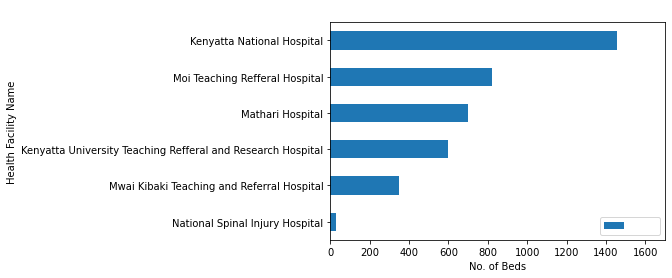

In [74]:
df_level6 = df[df['Keph level'] == 'Level 6'][['Name', 'Beds']].set_index('Name').sort_values('Beds')
ax = df_level6.plot(kind='barh', title='Beds across Level 6 Hospitals', fig=(10,10));
ax.set_ylabel('Health Facility Name')
ax.set_xlabel('No. of Beds')
ax.set_xlim(0, 1700)
ax.bar_label(ax.containers[0]);

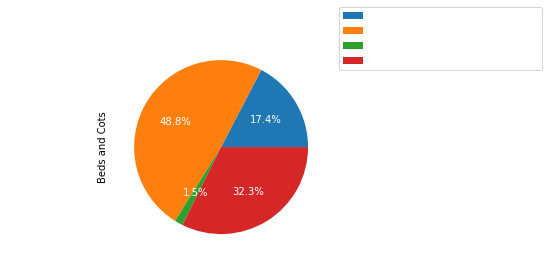

In [75]:
import matplotlib as mpl
mpl.rcParams['text.color'] = 'white'

pie_data = df.groupby('Owner type').agg({'Beds and Cots': 'sum'})
pie_data.plot(kind='pie', y='Beds and Cots', autopct='%1.1f%%', title='Beds and Cots by Owner Type').legend(loc='right',bbox_to_anchor=(2.0, 1.0));

Text(0, 0.5, 'Health Facilities')

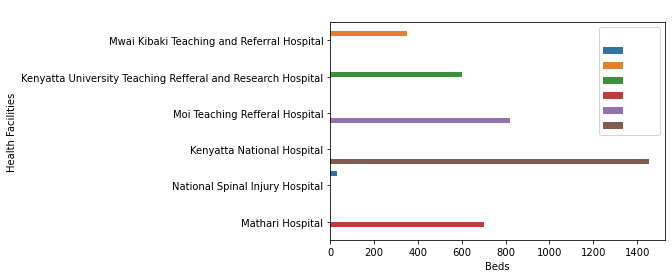

In [80]:
#Using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

l6 = df.loc[df['Keph level']== 'Level 6']
sns.barplot(data = l6, x = 'Beds', y = 'Name', hue = 'Beds')
plt.title('Number of Beds')
plt.ylabel('Health Facilities')